In [ ]:
!pip install wordcloud-fa
!pip install wordcloud
!pip install pyLDAvis
!pip install numpy==1.23.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394472 sha256=651f3e39d76e6bae7f66e7e0848cd13d58573a8b2a7c6671bfcfce3b921ef578
  Stored in directory: /root/.cache/pip/wheels/6b/6d/14/3defa4cd7013faeddf715150696f4a96d7725c87700eb8a68e
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp310-cp310-linux_x86_64.whl size=179246 sha256=95a8ef7af4fd0b628c561a166385f536836145740752bae54bd3f5f7423f5421
  Stored in directory: /root/.cache/pip/wheels/9f/cb/30/fef48ecac051e433987eccdb5682900b4c

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import glob

from wordcloud import WordCloud

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import TfidfModel

import spacy

import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('words')
nltk.download('perluniprops')
nltk.download('punkt')




from google.colab import drive
drive.mount('/content/drive/')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Mounted at /content/drive/


In [ ]:
data = sqlite3.connect('/content/drive/MyDrive/data/browser (1).db')
query = data.execute("SELECT * From browser")
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
results.replace(np.nan,'',inplace=True)
results['text'] = (results["comment1"].astype(str) + results["comment2"].astype(str) +results["comment3"].astype(str) +results["comment4"].astype(str) +
                   results["comment5"].astype(str) + results["reaction1"].astype(str) + results["reaction2"].astype(str) + results["reaction3"].astype(str) +
                   results["reaction4"].astype(str) + results["reaction5"].astype(str) + results["reaction1"].astype(str) +
                   results["post1"].astype(str) + results["post2"].astype(str) +results["post3"].astype(str) +results["post4"].astype(str) +
                   results["post5"].astype(str) )
results

,id,name,bio,university,grade,job,about,experience,education,skills,...,comment3,comment4,comment5,reaction1,reaction2,reaction3,reaction4,reaction5,link,text
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,Excited to share that I have started a new res...,I’m happy to share that I’m starting a new pos...,It was a pleasure to learn Python as my first ...,How cells in your body move:\r\n\r\nCells can ...,#Bone_tissue_engineering\n\nIn bone tissue eng...,Truly honored to receive the Connors BWH-MGB C...,I’m happy to share that I’ve obtained a new ce...,Excited to share my IELTS score ( 7 ). Hard wo...,https://www.linkedin.com/in/saba-nassiripour/,It is with great pleasure that I hereby declar...
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,,,,📣 Nano Letters publication alert! Using the DE...,I am thrilled to have been elected to the Amer...,UncorrelaTEd FET Open Project and coordinating...,"April 20, 2023 marks an important milestone in...",In situ transmission electron microscopy inves...,https://www.linkedin.com/in/zahra-lalegani-085...,من که همخوانی محتوای عکس با متن منتشر شده در م...
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,...,I’m happy to share that I’m starting a new pos...,"Today, I have officially started my #PhD journ...",,I'm glad to announce that I successfully defen...,It is with great pleasure that I hereby declar...,Appreciation ceremony for the active members o...,Hi everyone - I am looking for a new role and ...,I would like to share our last paper on the el...,https://www.linkedin.com/in/zahra-behrooznia-6...,Finally!!!\r\nI'm so excited to share my IELTS...
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,...,This Chapter is over. Thanks to everyone who h...,I am delighted to announce that our review art...,Here is the result of my #IELTS exam. As a per...,New Paper: Fabrication and optimization of AA5...,Advanced Functional Ceramics\r\nYonsei Univers...,I am delighted to announce that I was given an...,نظر دوستان چیست که ویدیوهایی راجع به موضوعات م...,"In a normal country, you will be happy with yo...",https://www.linkedin.com/in/abolfazl-anvari,New Paper: Fabrication and optimization of AA5...
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,.,,,We have built a #non_contact #liquid_level #co...,Not a fan of posting everything actually. But ...,I am thrilled to announce that my friend Erfan...,We all create - or recreate - our realities. W...,GeoMars is a technological platform consisting...,https://www.linkedin.com/in/seyed-saeed-mohagh...,...We have built a #non_contact #liquid_level ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,897,Farbod Asareh,Student at K. N. Toosi University of Technology,Kharazmi University,"Industrial Engineering,",,"Currently, I am working on a project called To...",Electronic Engineer,Sharif University of Technology,,...,,,,مرحله نهایی #گیمین هم جمعه، در بازار چارسو تهر...,سخت‌ترین رویداد #گیمین بالاخره برگزار شد!\nگیم...,تبلیغی از اپل برای قابلیت «نویز کنسلیشن» دوبرا...,I’m happy to share that I’ve obtained a new ce...,,https://www.linkedin.com/in/farbod-asareh-861a...,مرحله نهایی #گیمین هم جمعه، در بازار چارسو تهر...
897,898,Mahdi Saeidpanah\r\n,Student at D

In [ ]:
words = set(nltk.corpus.words.words())

dataset = pd.DataFrame(columns=('text','id'))
for index,row   in results.iterrows():
  title_body = row['text']
  dataset.loc[index] = {'text': ' '.join(w for w in nltk.wordpunct_tokenize(title_body) if w.lower() in words or not w.isalpha()),
                        'University': row['id']}


In [ ]:
dataset

,text,id
0,It is with great pleasure that I hereby declar...,NaN
1,( ).. ، .. : comment = ( ).. ، ..📣 publication...,NaN
2,Finally !!! I ' m so excited to share my ... S...,NaN
3,New Paper : Fabrication and optimization of AA...,NaN
4,... We have built a # non_contact # liquid_lev...,NaN
...,...,...
896,# ، ۲۰۲۲ . # منابع_انسانی . # Gamein2022سخت ‌ ...,NaN
897,"This , 8 three since the of 752 . and were gra...",NaN
898,I ’ m happy to share that I ’ m starting a new...,NaN
899,I ’ m happy to share that I ’ m starting a new...,NaN


In [ ]:
data = dataset['text']
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(data)


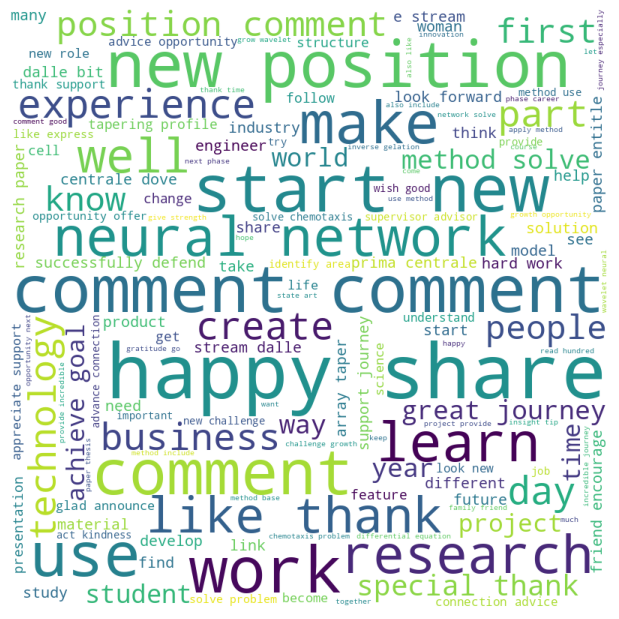

In [ ]:
# comment_words = ''
# comment_words += " ".join(lemmatized_texts)+" "
# words = set(nltk.corpus.words.words())

# sent = " ".join(w for w in nltk.wordpunct_tokenize(comment_words) if w.lower() in words or not w.isalpha())
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(str(sent))

# # plot the WordCloud image
# plt.figure(figsize = (6, 10), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

# plt.show()

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = []
stopwords.extend(newStopWords)
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        new = [i for i in new if str(i) not in stopwords]
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['great', 'pleasure', 'hereby', 'declare', 'successful', 'defense', 'thesis', 'study', 'construction', 'initial', 'edge', 'dislocation', 'aluminum', 'simulation', 'analytical', 'journey', 'lead', 'moment', 'immense', 'personal']


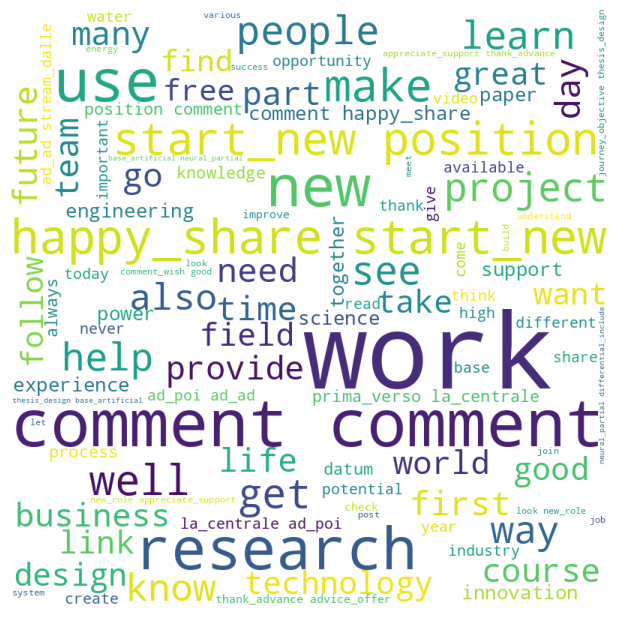

In [ ]:
comment_words = ''
comment_words = ''.join(str(x) for x in data_words)
words = set(nltk.corpus.words.words())

sent = " ".join(w for w in nltk.wordpunct_tokenize(comment_words) if w.lower() in words or not w.isalpha())
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(str(sent))

# plot the WordCloud image
plt.figure(figsize = (6, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
data_words_bigrams = make_bigrams(data_words)
data_words = data_words_bigrams

In [ ]:
id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)
low_value = 0.03
words = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [ ]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]


[[('academic', 1),
  ('accomplish', 1),
  ('acid', 3),
  ('acquire', 1),
  ('actin', 4),
  ('activity', 1),
  ('add', 1),
  ('additionally', 1),
  ('adhesion', 1),
  ('advanced', 1),
  ('advice', 1),
  ('alcocrfeni_eutectic', 2),
  ('alginate', 1),
  ('alloy', 2),
  ('aluminum', 1),
  ('analytical', 1),
  ('appreciate', 1),
  ('appreciation', 1),
  ('arduous', 1),
  ('arm', 1),
  ('assistance', 1),
  ('behavior', 1),
  ('beta', 1),
  ('biological', 2),
  ('body', 2),
  ('bone', 7),
  ('carefully', 1),
  ('cell', 8),
  ('cellular', 2),
  ('ceramic', 3),
  ('chapter', 1),
  ('class', 1),
  ('colleague', 1),
  ('combination', 1),
  ('commonly_use', 1),
  ('compose', 1),
  ('construct', 1),
  ('construction', 1),
  ('contain', 1),
  ('contribute', 1),
  ('contribution', 2),
  ('create', 2),
  ('credit_biology', 2),
  ('critical', 2),
  ('declare', 1),
  ('decomposition', 1),
  ('deeply_grateful', 1),
  ('delighted', 1),
  ('derive', 1),
  ('development', 2),
  ('differentiation', 1),
  ('d

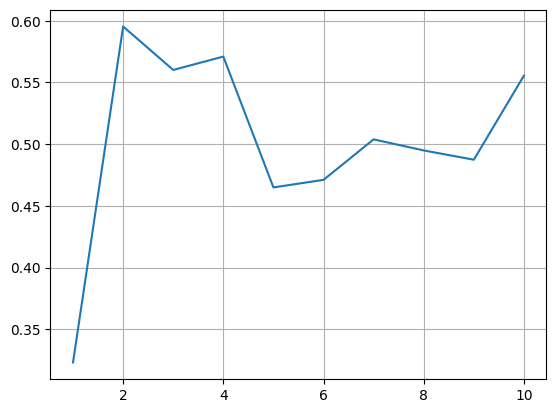

In [ ]:
list1 = []
for i in range(1,11):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=i,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
  from gensim.models import CoherenceModel

  coherence_model_ldamallet = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_ldamallet = coherence_model_ldamallet.get_coherence()
  list1.append(coherence_ldamallet)
xs = [x for x in range(1,11)]

plt.plot(xs, list1)
plt.grid()
plt.show()
plt.close()



In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=3,
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes=10,
                                          alpha="auto")
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=15)
vis




/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.188412  0.041633       1        1  61.708355
1      0.015655 -0.192976       2        1  22.159842
2     -0.204066  0.151343       3        1  16.131803, topic_info=             Term        Freq       Total Category  logprob  loglift
39        comment  449.000000  449.000000  Default  15.0000  15.0000
413          base  244.000000  244.000000  Default  14.0000  14.0000
242         thank  348.000000  348.000000  Default  13.0000  13.0000
1111        datum  286.000000  286.000000  Default  12.0000  12.0000
309    like_thank  113.000000  113.000000  Default  11.0000  11.0000
...           ...         ...         ...      ...      ...      ...
39        comment  260.960026  449.445680   Topic3  -4.0545   1.2807
309    like_thank   81.110383  113.623529   Topic3  -5.2230   1.4873
242         thank   94.528324  348.338455   Topic3  -5.0699   0.5201
100   happy_share   88.366266  284.995064   Topic3  -5.1374   0.6534
244          time   74.276895  324.545998   Topic3  -5.3110   0.3498

[103 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
14        1  0.705718    also
14        2  0.292939    also
1037      1  0.986624  always
413       1  0.147167    base
413       2  0.780801    base
...     ...       ...     ...
515       1  0.991883   video
262       1  0.893372    work
262       2  0.072694    work
262       3  0.034434    work
405       1  0.992324   world

[145 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
from pprint import pprint

# Print the Keyword in the 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"work" + 0.006*"new" + 0.006*"research" + 0.005*"learn" + '
  '0.004*"thank" + 0.004*"make" + 0.004*"time" + 0.004*"project" + '
  '0.004*"life" + 0.004*"day"'),
 (1,
  '0.009*"base" + 0.009*"datum" + 0.006*"research" + 0.006*"use" + '
  '0.006*"paper" + 0.004*"model" + 0.004*"high" + 0.004*"knowledge" + '
  '0.003*"science" + 0.003*"cancer"'),
 (2,
  '0.017*"comment" + 0.006*"thank" + 0.006*"happy_share" + 0.005*"like_thank" '
  '+ 0.005*"time" + 0.004*"tapering_profile" + 0.004*"family_encourage" + '
  '0.004*"use_method" + 0.004*"new_growth" + 0.004*"solve_fractional"')]


# Men

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data/فایل اکسل نهایی 2.xlsx')
df.head()

,createdDate,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,Unnamed: 7,Unnamed: 8,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,2022-12-12 11:21:38,پیام نور,3,تجربی,کارگر,مرغداری,1,NaN,NaN,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2022-10-24 09:47:24,تهران,1,مدیریت بازرگانی,دانشجو,۲سال,2,NaN,NaN,مجرد,21.0,36.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,2022-10-13 10:23:07,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,NaN,NaN,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,2022-09-25 08:22:01,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,NaN,NaN,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,2022-07-26 16:39:23,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,NaN,NaN,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
dfT = pd.concat([data,df],axis=1)
dfT.head()

,id,name,bio,university,grade,job,about,experience,education,skills,...,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,متاهل,47.0,1.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,مجرد,21.0,3.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,...,مجرد,0.0,1.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,...,مجرد,11.0,1.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,مجرد,33.0,1.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
dfT = dfT.iloc[0:899]

In [ ]:
dfM = dfT[dfT['جنسیت']=='مذکر']
dfM.head()

,text,createdDate,university,کد دانشگاه,grade,job,experience,کد تجربه کاری,Unnamed: 7,Unnamed: 8,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,It is with great pleasure that I hereby declar...,2022-12-12 11:21:38,پیام نور,3,تجربی,کارگر,مرغداری,1,NaN,NaN,متاهل,47.0,26.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
2,Finally !!! I ' m so excited to share my ... S...,2022-10-13 10:23:07,تهران,1,مهندسی مواد/شناسایی و انتخاب مواد,دانشجو,۱ سال,1,NaN,NaN,مجرد,0.0,0.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,New Paper : Fabrication and optimization of AA...,2022-09-25 08:22:01,دانشگاه تهران,1,مهندسی متالورژی,پستداک,5 سال,3,NaN,NaN,مجرد,11.0,28.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,... We have built a # non_contact # liquid_lev...,2022-07-26 16:39:23,تهران,1,مواد و متالورژی,R&D,تحقیق و توسعه,3,NaN,NaN,مجرد,33.0,27.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی
6,,2022-07-25 06:38:53,شیراز,1,مهندسی برق گرایش کنترل,دانشجو,کارآموزی در شرکت ساخت پرینتر سه بعدی,1,NaN,NaN,مجرد,26.0,29.0,30.0,26.0,28.0,· 24-28 سال,مذکر,کارشناسی ارشد,قراردادی


In [ ]:
data = dfM['text']
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(data)
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = []
stopwords.extend(newStopWords)
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        new = [i for i in new if str(i) not in stopwords]
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['great', 'pleasure', 'hereby', 'declare', 'successful', 'defense', 'thesis', 'study', 'construction', 'initial', 'edge', 'dislocation', 'aluminum', 'simulation', 'analytical', 'journey', 'lead', 'moment', 'immense', 'personal']


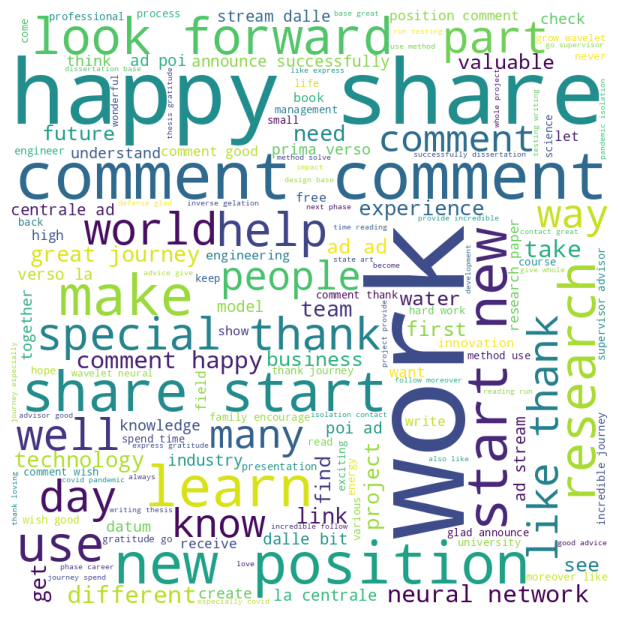

In [ ]:
comment_words = ''
comment_words = ''.join(str(x) for x in data_words)
words = set(nltk.corpus.words.words())

sent = " ".join(w for w in nltk.wordpunct_tokenize(comment_words) if w.lower() in words or not w.isalpha())
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(str(sent))

# plot the WordCloud image
plt.figure(figsize = (6, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
data_words_bigrams = make_bigrams(data_words)
data_words = data_words_bigrams
id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)
low_value = 0.03
words = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=3,
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes=10,
                                          alpha="auto")
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=15)
vis


[(0, 1), (1, 1), (2, 3), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.001467  0.178804       1        1  46.529364
0      0.189193  0.002449       2        1  37.192352
2     -0.190660 -0.181254       3        1  16.278284, topic_info=             Term        Freq       Total Category  logprob  loglift
38        comment  365.000000  365.000000  Default  15.0000  15.0000
101   happy_share  200.000000  200.000000  Default  14.0000  14.0000
204      research  325.000000  325.000000  Default  13.0000  13.0000
244         thank  226.000000  226.000000  Default  12.0000  12.0000
1435   like_thank   66.000000   66.000000  Default  11.0000  11.0000
...           ...         ...         ...      ...      ...      ...
38        comment  141.415652  365.188101   Topic3  -4.2241   0.8666
1435   like_thank   47.065639   66.887880   Topic3  -5.3243   1.4639
436           see   55.431294  157.098171   Topic3  -5.1607   0.7736
244         thank   58.148846  226.739240   Topic3  -5.1128   0.4545
383          good   39.564423  154.803565   Topic3  -5.4979   0.4511

[110 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
268       1  0.979587        advice_offer
269       1  0.986202  appreciate_support
3805      2  0.983516               asset
1386      1  0.989102           available
4504      3  0.994335     base_artificial
...     ...       ...                 ...
264       1  0.819091                work
264       2  0.160257                work
264       3  0.023742                work
341       1  0.311832                year
341       2  0.679347                year

[160 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"use" + 0.005*"new" + 0.004*"life" + 0.004*"learn" + 0.004*"datum" + '
  '0.003*"day" + 0.003*"people" + 0.003*"know" + 0.003*"make" + 0.003*"many"'),
 (1,
  '0.010*"research" + 0.010*"work" + 0.008*"comment" + 0.007*"position" + '
  '0.006*"new" + 0.006*"happy_share" + 0.006*"start_new" + 0.005*"thank" + '
  '0.005*"share" + 0.004*"time"'),
 (2,
  '0.015*"comment" + 0.006*"thank" + 0.006*"see" + 0.005*"like_thank" + '
  '0.004*"good" + 0.004*"family_encourage" + 0.004*"differential_include" + '
  '0.004*"base_artificial" + 0.004*"elliptic_apply" + 0.004*"new_growth"')]


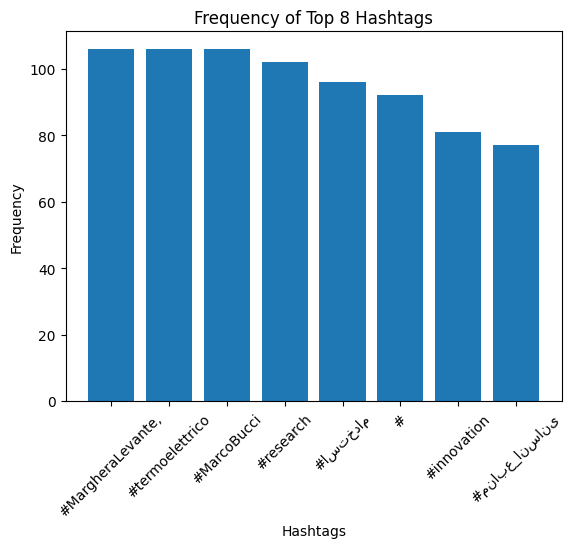

In [ ]:
def plot_hashtags_bar_chart(text):
    # جدا کردن کلمات متن
    words = text.split()

    # جمع‌آوری هشتگ‌ها
    hashtags = [word for word in words if word.startswith('#')]

    # شمارش تعداد هر هشتگ
    hashtag_counts = {}
    for hashtag in hashtags:
        hashtag_counts[hashtag] = hashtag_counts.get(hashtag, 0) + 1

    sorted_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)

    # استخراج نام هشتگ‌ها و تعداد فراوانی‌ها
    labels = [item[0] for item in sorted_hashtags[:8]]
    values = [item[1] for item in sorted_hashtags[:8]]

    # رسم نمودار میله‌ای
    plt.bar(labels, values)
    plt.xlabel('Hashtags')
    plt.ylabel('Frequency')
    plt.title('Frequency of Top 8 Hashtags')
    plt.xticks(rotation=45)

    # نمایش نمودار
    plt.show()
text = results['text']
comment_words = ''
comment_words = ''.join(str(x) for x in text)

plot_hashtags_bar_chart(comment_words)


# ScoreE

In [ ]:
df.loc[(df['scoreE'] >= 0) & (df['scoreE'] < 18), 'scoreE'] = 1
df.loc[(df['scoreE'] >= 18) & (df['scoreE'] < 30), 'scoreE'] = 2
df.loc[(df['scoreE'] >= 30) , 'scoreE'] = 3
df

In [ ]:
dfT = pd.concat([results,df],axis=1)
dfT.head()

,id,name,bio,university,grade,job,about,experience,education,skills,...,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
0,1,saba nassiri pour,Research assist at university of Tehran|M.Sc. ...,tehran,Materials Engineering,student,I am a researcher in the field of Tissue Engin...,Masters Student,"university of tehran , imam khomein internatio...","tissue engineer , researcher",...,متاهل,47.0,2.0,21.0,35.0,31.0,کمتر از 20 سال,مذکر,دیپلم,پاره وقت
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,مجرد,21.0,3.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
2,3,Zahra Behrooznia,Research and development specialist at توسعه گ...,University of Tehran,"Bachelor's degree, Metallurgical Engineering\r\n",student,,Research and development specialist,University of Tehran,,...,مجرد,0.0,1.0,0.0,0.0,0.0,· 24-28 سال,مذکر,کارشناسی,پیمانی
3,4,Abolfazl Anvari,3d-bioprinting R&D at OmidAfarinan. Nano educa...,University of Tehran,Ph.D. Student in Computer Science,نشریه فراسوی مواد,,"\r\nManaging Editor , Educational NanoTechnolo...","\r\nUniversity of Tehran\r\nBachelor's degree,...",,...,مجرد,11.0,2.0,17.0,30.0,34.0,· 28-32 سال,مذکر,کارشناسی ارشد,قراردادی
4,5,seyed saeed mohaghegh,Student of Electrical Engineering at Shiraz Un...,Shiraz University,Electrical Engineering,Student,,,Shiraz University,"Python (Programming Language) , \r\nDeep Learn...",...,مجرد,33.0,2.0,27.0,30.0,35.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
dfT = dfT.iloc[0:899]
dfM = dfT[dfT['scoreE']== 3]
dfM

,id,name,bio,university,grade,job,about,experience,education,skills,...,typeMarried,scoreN,scoreE,scoreO,scoreA,scoreC,سن,جنسیت,تحصیلات,نوع استخدام
1,2,Zahra Lalegani,University of Tehran,University of Tehran,,student,,,University of Tehran,,...,مجرد,21.0,3.0,42.0,37.0,33.0,· 20-24 سال,مونث,فوق دیپلم,قراردادی
11,12,Mahdi Abdollahi,Ph.D. Candidate at Institute for Research in F...,Sharif University of Technology,"Physics\r\n,",Junior Data Scientist,,,Institute for Research in Fundamental Sciences...,"Mathematics Education , \nPython (Programming ...",...,مجرد,26.0,3.0,24.0,29.0,39.0,· 32-36 سال,مونث,کارشناسی,قراردادی
15,16,mohammad maddahi,Human Resources Manager,qazvin university,Human Resources Manager,TOP | سوپر اپلیکیشن تاپ,,"Human Resources Manager at ava(izbank) , Human...","qazvin azad university , qazvin university","\r\nCustomer Service , \r\nMicrosoft Office \r...",...,متاهل,19.0,3.0,28.0,32.0,31.0,· 32-36 سال,مذکر,کارشناسی ارشد,قراردادی
16,17,Amir Zarei,Msc Student at Shiraz University,Shiraz University,Control engineering,Msc Student,I’m a big AI and Deep Learning enthusiast grea...,High voltage substation operator,Shiraz University,\r\nProgrammable Logic Controller (PLC)Program...,...,مجرد,17.0,3.0,30.0,34.0,38.0,· 24-28 سال,مذکر,کارشناسی,قراردادی
20,21,Ali Talebi,Master student physics: complex systems,Shahid Beheshti University,physics,student,My name is Ali Talebi and I am 23 years old. I...,Ferdowsi University of Mashhad,"Shahid Beheshti University , Ferdowsi Univers...",\r\nBashBash\r\nLinuxLinux\r\nFortran\r\nMathe...,...,متاهل,11.0,3.0,26.0,38.0,40.0,· 28-32 سال,مونث,کارشناسی ارشد,پیمانی
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,895,Matin Hamidi,"MS.c Student in Industrial Engineering, Financ...",K. N. Toosi University of Technology,"MEng, Logistics and Supply Chain Management",,"In addition, I worked at Tyndall National Inst...",Embedded Software Engineer,Iran University of Science and Technology,English,...,مجرد,16.0,3.0,23.0,35.0,27.0,· 28-32 سال,مونث,کارشناسی,رسمی
895,896,Sadroddin Arbabi,Senior Consultant at ILIA Corporation,,Mechanical Engineering,,,Research Assistant,K. N. Toosi University of Technology\r\n,Research,...,مجرد,17.0,3.0,21.0,31.0,35.0,· بیشتر از 36 سال,مذکر,کارشناسی ارشد,رسمی
896,897,Farbod Asareh,Student at K. N. Toosi University of Technology,Kharazmi University,"Industrial Engineering,",,"Currently, I am working on a project called To...",Electronic Engineer,Sharif University of Technology,,...,متاهل,17.0,3.0,38.0,30.0,41.0,· 28-32 سال,مونث,دکتری,قراردادی
897,898,Mahdi Saeidpanah\r\n,Student at Department of Industrial Engineerin...,Khatam University,Industrial Engineering,,,,Sharif University of Technology,Microsoft Office,...,مجرد,22.0,3.0,30.0,33.0,36.0,· 32-36 سال,مذکر,دکتری,پیمانی


In [ ]:
words = set(nltk.corpus.words.words())

dataset = pd.DataFrame(columns=('text','id'))
for index,row   in dfM.iterrows():
  title_body = row['text']
  dataset.loc[index] = {'text': ' '.join(w for w in nltk.wordpunct_tokenize(title_body) if w.lower() in words or not w.isalpha()),
                        'University': row['id']}
dataset

,text,id
1,( ).. ، .. : comment = ( ).. ، ..📣 publication...,NaN
11,Getting with Modern Data - Snowflake Platform ...,NaN
15,I ’ m happy to share that I ’ m starting a new...,NaN
16,the # drug_delivery simulation of the respirat...,NaN
20,(: : comment = . . # : comment = . ‌. ‌. sleep...,NaN
...,...,...
894,. ‌ . ‌ ‌ ‌ ‌ ، ‌ ‌ - ، ‌ :) . We are ! 🔹️ Tec...,NaN
895,『 』 :// . in / gFFVH58Y # robot # # # grasping...,NaN
896,# ، ۲۰۲۲ . # منابع_انسانی . # Gamein2022سخت ‌ ...,NaN
897,"This , 8 three since the of 752 . and were gra...",NaN


In [ ]:
data = dataset['text']
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(data)
stopwords = nltk.corpus.stopwords.words('english')

with open('stopwords.txt') as stopwords_file:
    stopwords = stopwords_file.readlines()
stopwords = [str(line).replace('\n', '') for line in stopwords]

nltk_stopwords = nltk.corpus.stopwords.words('english')
nltk_stopwords.extend(stopwords)

newStopWords = []
stopwords.extend(newStopWords)
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        new = [i for i in new if str(i) not in nltk_stopwords]
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['comment', 'publication', 'alert', 'lightning', 'system', 'group', 'world', 'renowned', 'able', 'observe', 'entire', 'heat', 'induce', 'structural', 'evolution', 'atomic', 'level', 'solid', 'liquid', 'heat']


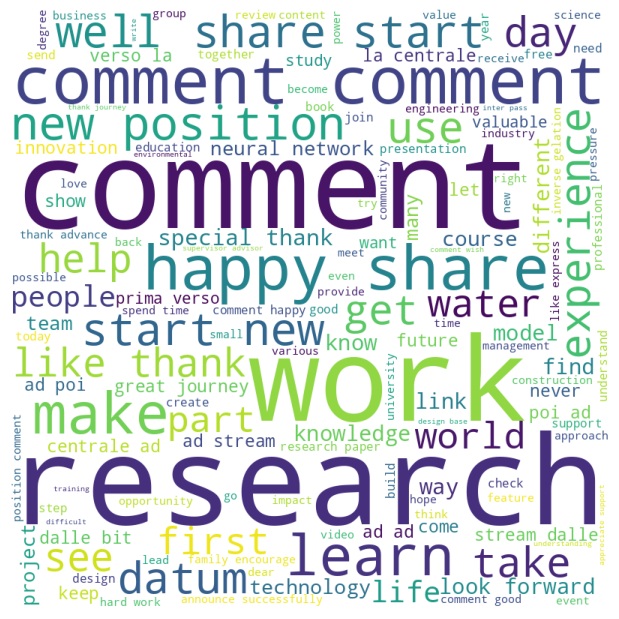

In [ ]:
comment_words = ''
comment_words = ''.join(str(x) for x in data_words)
words = set(nltk.corpus.words.words())

sent = " ".join(w for w in nltk.wordpunct_tokenize(comment_words) if w.lower() in words or not w.isalpha())
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(str(sent))

# plot the WordCloud image
plt.figure(figsize = (6, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
data_words_bigrams = make_bigrams(data_words)
data_words = data_words_bigrams
id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)
low_value = 0.03
words = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = []
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=3,
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes=10,
                                          alpha="auto")
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=15)
vis

[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 4), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1)]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.154858  0.040321       1        1  47.826887
2      0.008200 -0.166750       2        1  33.088580
1     -0.163058  0.126429       3        1  19.084534, topic_info=                Term        Freq       Total Category  logprob  loglift
14           comment  189.000000  189.000000  Default  15.0000  15.0000
2526           class   73.000000   73.000000  Default  14.0000  14.0000
179              new  181.000000  181.000000  Default  13.0000  13.0000
112            thank  126.000000  126.000000  Default  12.0000  12.0000
219              way   81.000000   81.000000  Default  11.0000  11.0000
...              ...         ...         ...      ...      ...      ...
14           comment   48.824732  189.659423   Topic3  -4.9410   0.2993
108          support   36.172884   89.067017   Topic3  -5.2409   0.7552
213             time   27.035519  105.812751   Topic3  -5.5320   0.2918
92          research   29.605807  209.984805   Topic3  -5.4412  -0.3028
2023  forward_tackle   20.717288   21.345371   Topic3  -5.7982   1.6264

[104 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
124       1  0.993837  advice_offer
491       1  0.019122       article
491       2  0.592793       article
491       3  0.382447       article
1077      1  0.970947          back
...     ...       ...           ...
219       2  0.012267           way
3957      1  0.974689         white
121       1  0.689728          work
121       2  0.204580          work
121       3  0.105213          work

[147 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])